In [113]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")
%matplotlib inline

In [114]:
data = pd.read_csv('/content/Travel.csv')

In [115]:
df = data.copy()

In [116]:

df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


# **Exploratory data analysis and feature engineering**

In [117]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [119]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


In [120]:
df.shape

(4888, 20)

In [121]:
numeric_features = [feature for feature in df.columns if df[feature].dtype!='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype =='O']

print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 14 numerical features : ['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome']

We have 6 categorical features : ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


In [122]:
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

Self Enquiry       70.820481
Company Invited    29.179519
Name: TypeofContact, dtype: float64
---------------------------
Salaried          48.445172
Small Business    42.635025
Large Business     8.878887
Free Lancer        0.040917
Name: Occupation, dtype: float64
---------------------------
Male       59.656301
Female     37.172668
Fe Male     3.171031
Name: Gender, dtype: float64
---------------------------
Basic           37.684124
Deluxe          35.433715
Standard        15.180033
Super Deluxe     6.996727
King             4.705401
Name: ProductPitched, dtype: float64
---------------------------
Married      47.872340
Divorced     19.435352
Single       18.739771
Unmarried    13.952537
Name: MaritalStatus, dtype: float64
---------------------------
Executive         37.684124
Manager           35.433715
Senior Manager    15.180033
AVP                6.996727
VP                 4.705401
Name: Designation, dtype: float64
---------------------------


## **Univariate Analysis**

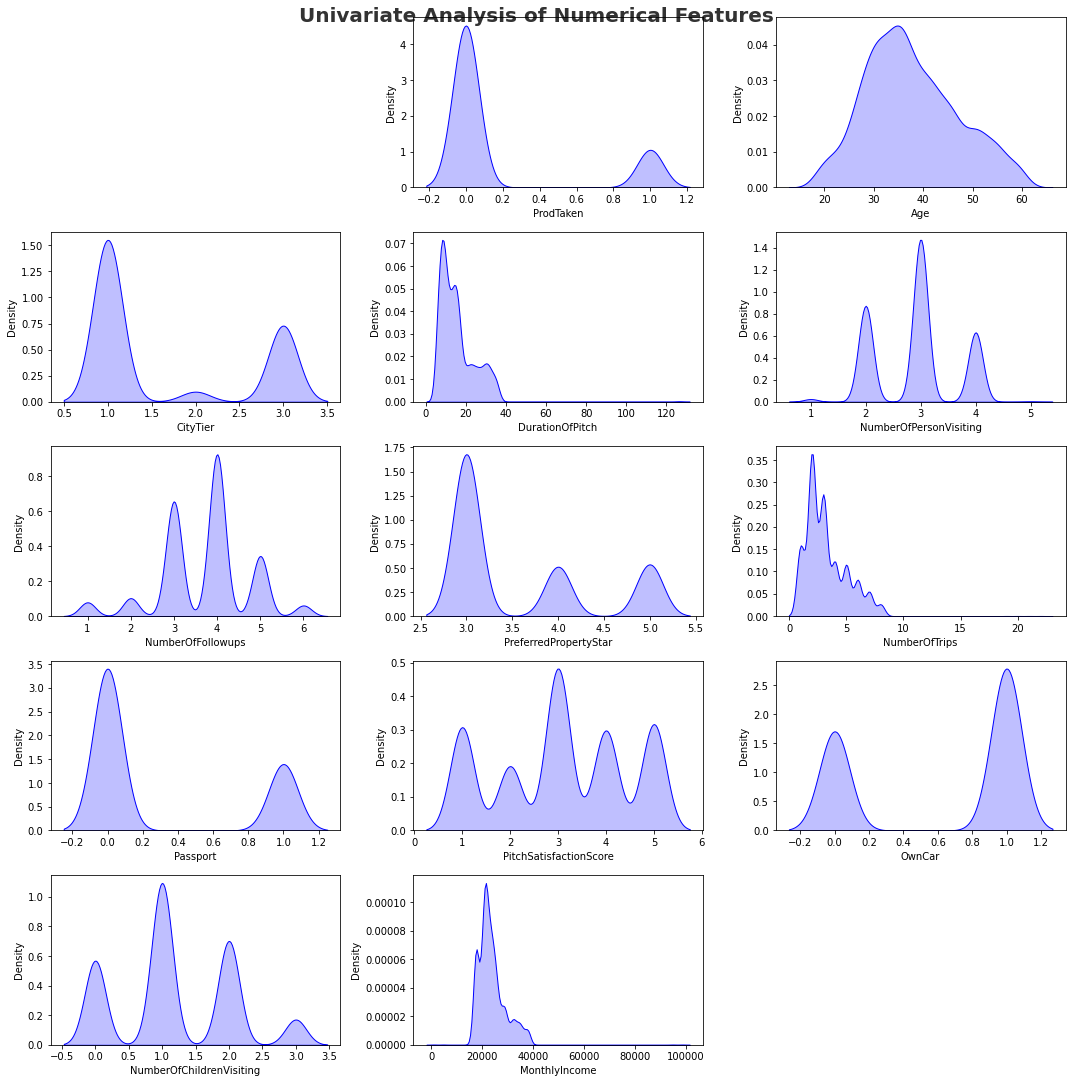

In [123]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(1, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

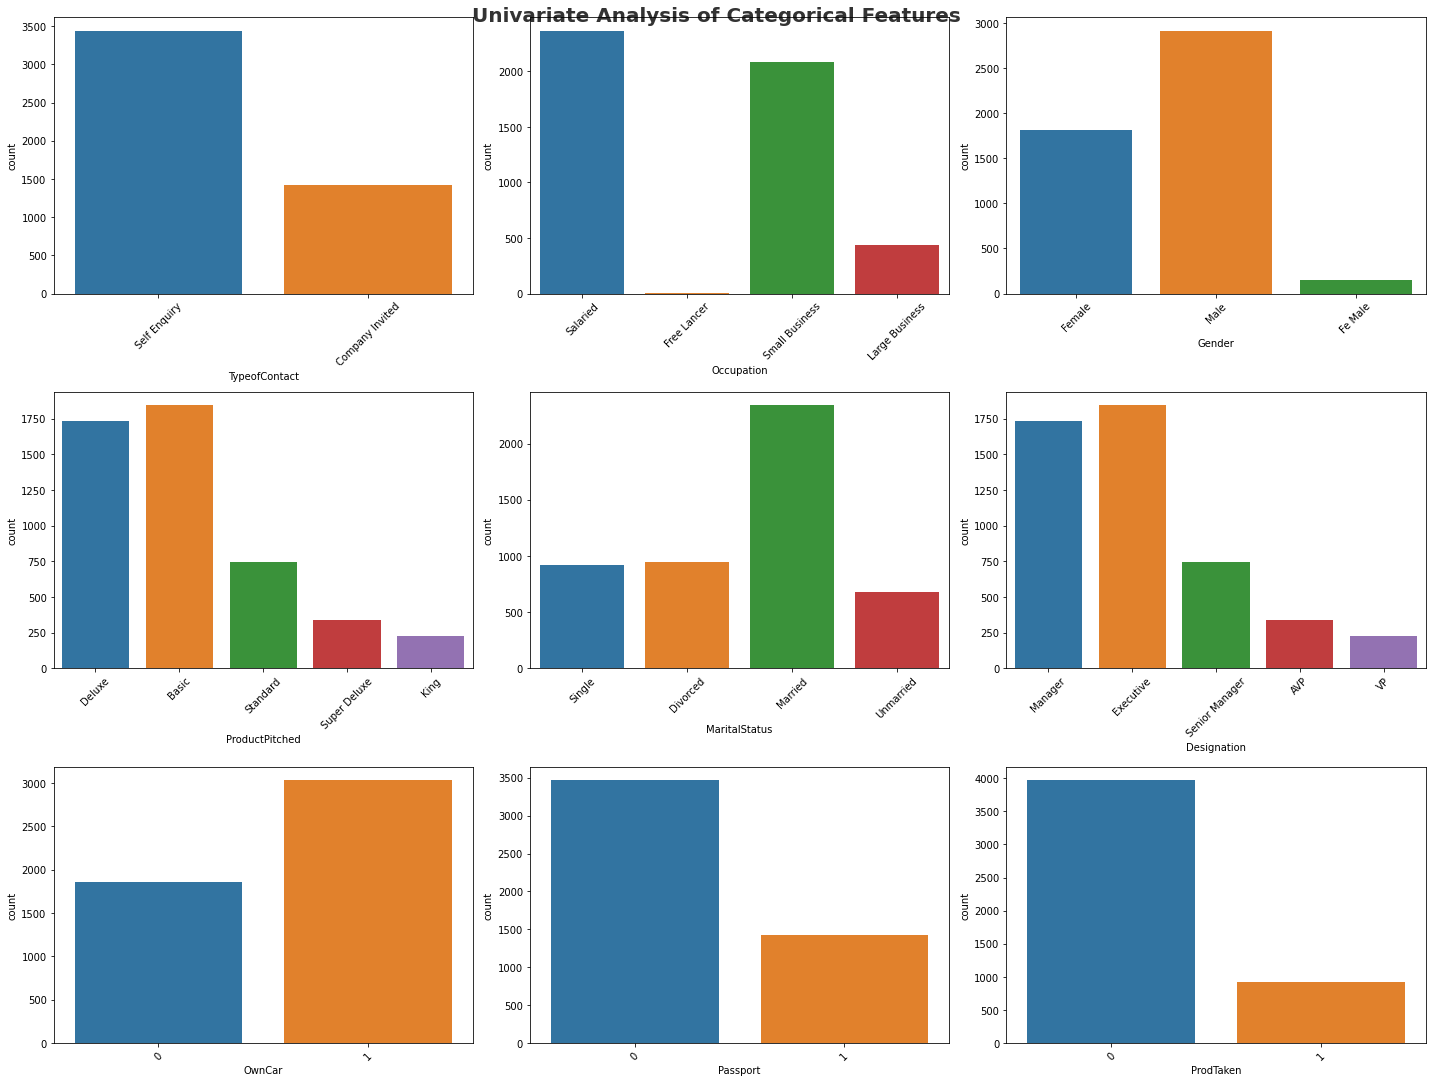

In [124]:
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
cat1 = ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation','OwnCar','Passport','ProdTaken']
for i in range(0, len(cat1)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

## **Handling Null Values**

In [125]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [126]:
df['Age'] = df['Age'].replace(np.nan,df['Age'].mean())
df['DurationOfPitch'] = df['DurationOfPitch'].replace(np.nan,df['DurationOfPitch'].mean())
df['NumberOfTrips'] = df['NumberOfTrips'].replace(np.nan, df['NumberOfTrips'].mean())
df['NumberOfFollowups'] = df['NumberOfFollowups'].replace(np.nan, df['NumberOfFollowups'].mean())
df['PreferredPropertyStar'] = df['PreferredPropertyStar'].replace(np.nan, df['PreferredPropertyStar'].mean())
df['NumberOfChildrenVisiting'] = df['NumberOfChildrenVisiting'].replace(np.nan,df['NumberOfChildrenVisiting'].mean())
df['MonthlyIncome'] = df['MonthlyIncome'].replace(np.nan, df['MonthlyIncome'].mean())

In [127]:
df.isnull().sum()

CustomerID                   0
ProdTaken                    0
Age                          0
TypeofContact               25
CityTier                     0
DurationOfPitch              0
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
NumberOfFollowups            0
ProductPitched               0
PreferredPropertyStar        0
MaritalStatus                0
NumberOfTrips                0
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisiting     0
Designation                  0
MonthlyIncome                0
dtype: int64

In [128]:
df = df.dropna()
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

## **Multivariate Analysis**

In [129]:
df[(list(df.columns)[1:])].corr()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
ProdTaken,1.000000,-0.144572,0.087184,0.076438,0.008915,0.111892,0.099109,0.016001,0.261027,0.051952,-0.012020,0.007293,-0.128329
Age,-0.144572,1.000000,-0.016546,-0.011309,0.008450,-0.004778,-0.012424,0.175795,0.029981,0.017343,0.047625,0.003784,0.457464
CityTier,0.087184,-0.016546,1.000000,0.022078,-0.002017,0.023761,-0.011171,-0.028942,0.001749,-0.041260,0.005196,0.000510,0.050779
DurationOfPitch,0.076438,-0.011309,0.022078,1.000000,0.063484,0.009237,-0.006465,0.009495,0.032279,-0.002816,-0.001590,0.030429,-0.006004
NumberOfPersonVisiting,0.008915,0.008450,-0.002017,0.063484,1.000000,0.326945,0.033736,0.191798,0.008551,-0.019195,0.010181,0.607548,0.189798
NumberOfFollowups,0.111892,-0.004778,0.023761,0.009237,0.326945,1.000000,-0.025795,0.138384,0.003556,0.003850,0.010556,0.284761,0.173334
PreferredPropertyStar,0.099109,-0.012424,-0.011171,-0.006465,0.033736,-0.025795,1.000000,0.012369,0.000456,-0.021454,0.015236,0.036028,0.013468
NumberOfTrips,0.016001,0.175795,-0.028942,0.009495,0.191798,0.138384,0.012369,1.000000,0.012243,-0.003733,-0.012333,0.164963,0.121080
Passport,0.261027,0.029981,0.001749,0.032279,0.008551,0.003556,0.000456,0.012243,1.000000,0.002262,-0.022825,0.017928,0.002490
PitchSatisfactionScore,0.051952,0.017343,-0.041260,-0.002816,-0.019195,0.003850,-0.021454,-0.003733,0.002262,1.000000,0.067562,-0.000556,0.029763


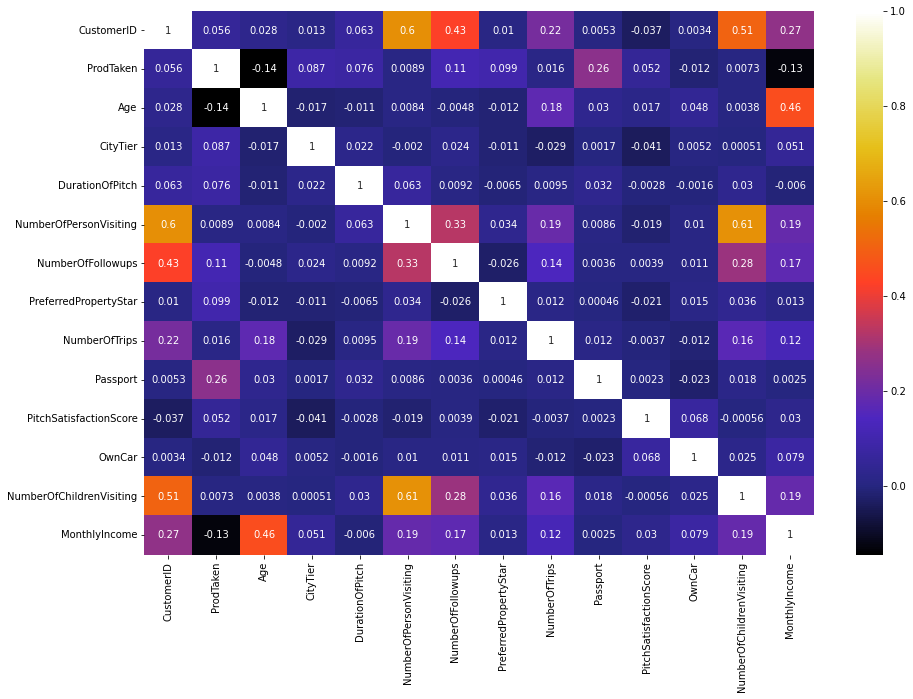

In [130]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

In [131]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['ProdTaken'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,TypeofContact,Reject Null Hypothesis
1,Occupation,Reject Null Hypothesis
2,Gender,Fail to Reject Null Hypothesis
3,ProductPitched,Reject Null Hypothesis
4,MaritalStatus,Reject Null Hypothesis
5,Designation,Reject Null Hypothesis


In [132]:
continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['CustomerID', 'Age', 'DurationOfPitch', 'NumberOfTrips', 'MonthlyIncome']


## **checking for outliers**

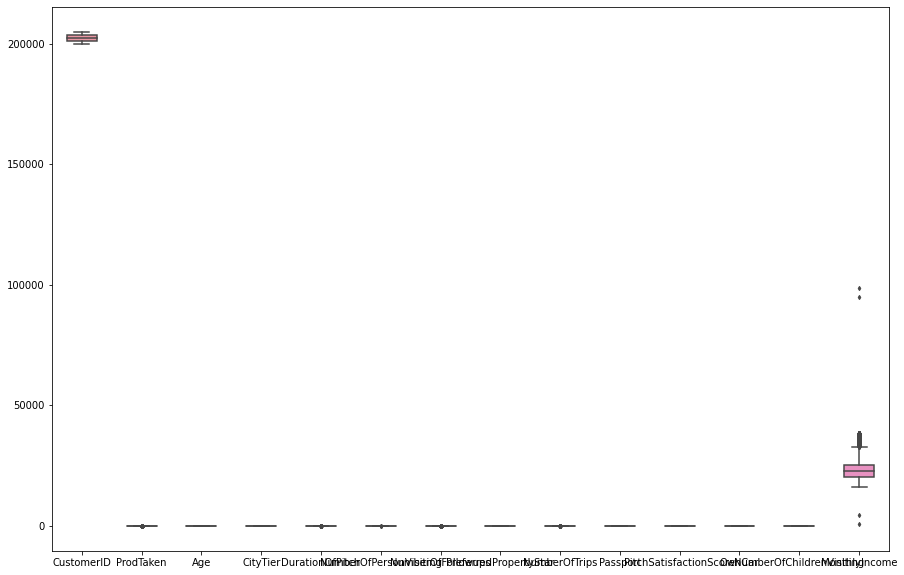

In [133]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

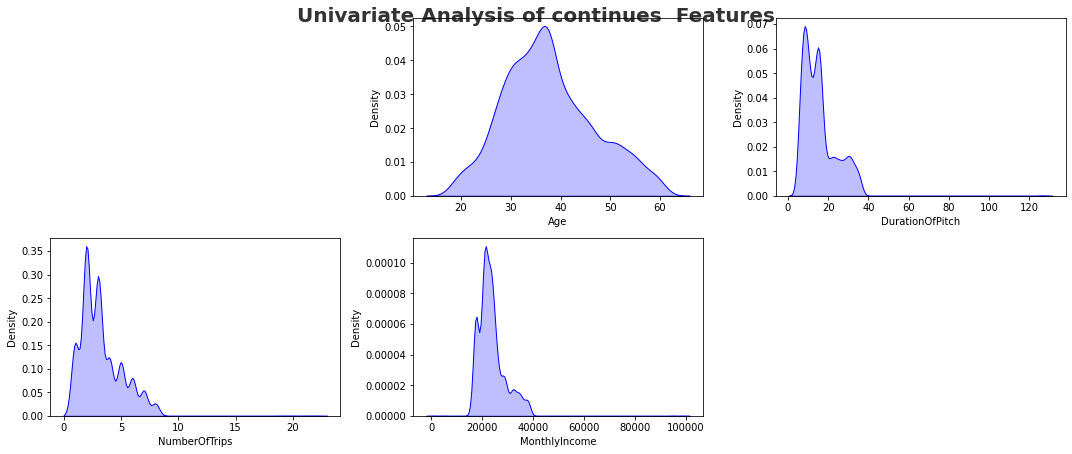

In [134]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of continues  Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(1, len(continues_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[continues_features[i]],shade=True, color='b')
    plt.xlabel(continues_features[i])
    plt.tight_layout()

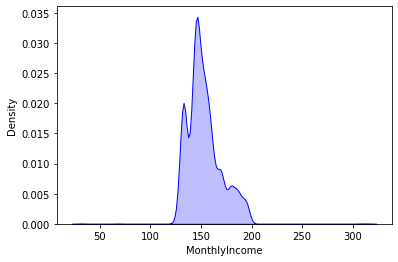

In [135]:
df['MonthlyIncome'] = np.sqrt(data['MonthlyIncome'])
sns.kdeplot(x=df['MonthlyIncome'],shade=True, color='b')


In [136]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                           0
TypeofContact                 0
CityTier                      0
DurationOfPitch               0
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups             0
ProductPitched                0
PreferredPropertyStar         0
MaritalStatus                 0
NumberOfTrips                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting      0
Designation                   0
MonthlyIncome               208
dtype: int64

In [137]:
df['MonthlyIncome'] = df['MonthlyIncome'].replace(np.nan, df['MonthlyIncome'].mean())

In [138]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [139]:
df = df.drop(['CustomerID'], axis=1)
df

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,144.889613
1,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,141.880231
2,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,130.728727
3,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,133.824512
4,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,135.897020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.000000,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,163.021471
4884,1,28.000000,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,145.643400
4885,1,52.000000,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,178.381613
4886,1,19.000000,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,142.439461


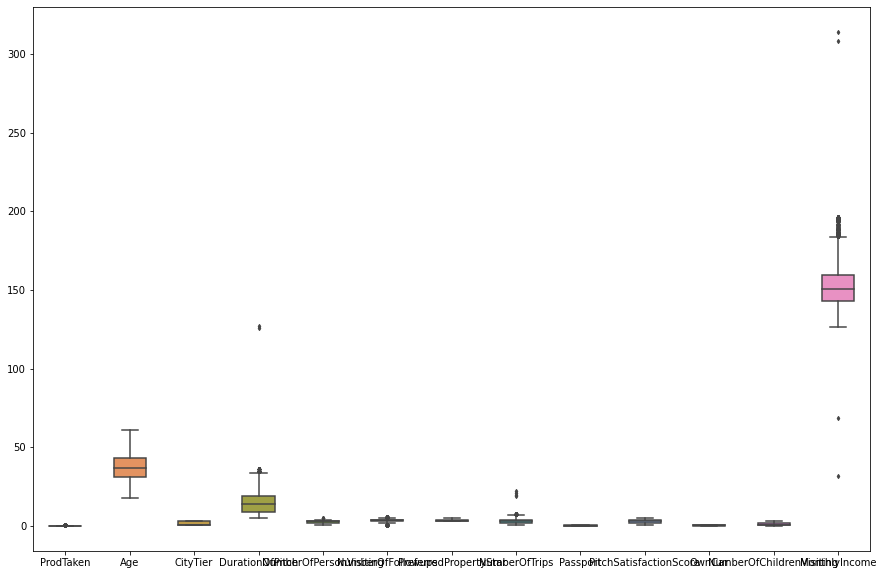

In [140]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

# **Encoding Categorical Vaiables**

In [141]:
#TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation'
from sklearn.preprocessing import LabelEncoder
le_classes = LabelEncoder()
df['TypeofContact'] = le_classes.fit_transform(df['TypeofContact'])
df['Occupation'] = le_classes.fit_transform(df['Occupation'])
df['Gender'] = le_classes.fit_transform(df['Gender'])
df['ProductPitched'] = le_classes.fit_transform(df['ProductPitched'])
df['MaritalStatus'] = le_classes.fit_transform(df['MaritalStatus'])
df['Designation'] = le_classes.fit_transform(df['Designation'])


In [142]:
df

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.000000,1,3,6.0,2,1,3,3.0,1,3.0,2,1.0,1,2,1,0.0,2,144.889613
1,0,49.000000,0,1,14.0,2,2,3,4.0,1,4.0,0,2.0,0,3,1,2.0,2,141.880231
2,1,37.000000,1,1,8.0,0,2,3,4.0,0,3.0,2,7.0,1,3,0,0.0,1,130.728727
3,0,33.000000,0,1,9.0,2,1,2,3.0,0,3.0,0,2.0,1,5,1,1.0,1,133.824512
4,0,37.622265,1,1,8.0,3,2,2,3.0,0,4.0,0,1.0,0,5,1,0.0,1,135.897020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.000000,1,3,9.0,3,2,3,5.0,1,4.0,3,2.0,1,1,1,1.0,2,163.021471
4884,1,28.000000,0,1,31.0,2,2,4,5.0,0,3.0,2,3.0,1,3,1,2.0,1,145.643400
4885,1,52.000000,1,3,17.0,2,1,4,4.0,3,4.0,1,7.0,0,1,1,3.0,3,178.381613
4886,1,19.000000,1,3,16.0,3,2,3,4.0,0,3.0,2,3.0,0,5,0,2.0,1,142.439461


In [143]:
X = df.drop(columns = ['ProdTaken'])
y = df['ProdTaken']

In [144]:
X

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,41.000000,1,3,6.0,2,1,3,3.0,1,3.0,2,1.0,1,2,1,0.0,2,144.889613
1,49.000000,0,1,14.0,2,2,3,4.0,1,4.0,0,2.0,0,3,1,2.0,2,141.880231
2,37.000000,1,1,8.0,0,2,3,4.0,0,3.0,2,7.0,1,3,0,0.0,1,130.728727
3,33.000000,0,1,9.0,2,1,2,3.0,0,3.0,0,2.0,1,5,1,1.0,1,133.824512
4,37.622265,1,1,8.0,3,2,2,3.0,0,4.0,0,1.0,0,5,1,0.0,1,135.897020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,49.000000,1,3,9.0,3,2,3,5.0,1,4.0,3,2.0,1,1,1,1.0,2,163.021471
4884,28.000000,0,1,31.0,2,2,4,5.0,0,3.0,2,3.0,1,3,1,2.0,1,145.643400
4885,52.000000,1,3,17.0,2,1,4,4.0,3,4.0,1,7.0,0,1,1,3.0,3,178.381613
4886,19.000000,1,3,16.0,3,2,3,4.0,0,3.0,2,3.0,0,5,0,2.0,1,142.439461


In [145]:
y

0       1
1       0
2       1
3       0
4       0
       ..
4883    1
4884    1
4885    1
4886    1
4887    1
Name: ProdTaken, Length: 4863, dtype: int64

In [146]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

## **Feature Scaling**

In [147]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [148]:
X_scaled

array([[ 0.36703572,  0.64188855,  1.46842647, ..., -1.39721512,
         0.28067371, -0.48681897],
       [ 1.24643673, -1.55790286, -0.71401788, ...,  0.95048184,
         0.28067371, -0.67226011],
       [-0.07266478,  0.64188855, -0.71401788, ..., -1.39721512,
        -0.75807535, -1.35942704],
       ...,
       [ 1.57621211,  0.64188855,  1.46842647, ...,  2.12433033,
         1.31942277,  1.57699181],
       [-2.05131704,  0.64188855,  1.46842647, ...,  0.95048184,
        -0.75807535, -0.63779982],
       [-0.1825899 ,  0.64188855, -0.71401788, ...,  0.95048184,
        -0.75807535,  0.13937316]])

In [149]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.381912,Age
1,1.005132,TypeofContact
2,1.062344,CityTier
3,1.013425,DurationOfPitch
4,1.029462,Occupation
5,1.030697,Gender
6,1.720824,NumberOfPersonVisiting
7,1.185528,NumberOfFollowups
8,2.363183,ProductPitched
9,1.007111,PreferredPropertyStar


In [150]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 0)

# **Model Training and predictions**

In [151]:
from sklearn.ensemble import RandomForestClassifier
rand_reg = RandomForestClassifier()

rand_reg.fit(x_train,y_train)

RandomForestClassifier()

In [152]:
y_pred = rand_reg.predict(x_test)

In [153]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.928453947368421